In [95]:
import math
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 24})
import os
import pints
import pandas as pd
from experimental_data_processing import processingExperimentalData
from Newton_model_numba import wrappedNewton, newtonRaphsonFT

In [96]:
# base directory
base_directory = os.path.join('Data', 'processed')
base_directory = os.path.join(base_directory, '220415')
base_directory = os.path.join(base_directory, 'ph6 2m nacl 25oC')
base_directory = os.path.join(base_directory, 'ac')
#base_directory = os.path.join(base_directory, 'blank')
base_directory = os.path.join(base_directory, '22 150_1')
# base_directory = os.path.join(base_directory, '144_1')
# base_directory = os.path.join(base_directory, '9_2b')

# reading in experimental data
input_data_file = os.path.join(base_directory, '22 150_1_cv_current')
# input_data_file = os.path.join(base_directory, '144_1_cv_current')

# file for outut
output_data_file = os.path.join(base_directory, '22 150_1_cv_current_reduced')
# output_data_file = os.path.join(base_directory, '144 150_1_cv_current_end_of')
# output_data_file = os.path.join(base_directory, '144_1_cv_current_reduced')
# output_data_file = os.path.join(base_directory, '144_1_cv_current_end_of')

# frequency of experimental data
freq = 2.197921e+01

In [97]:
# creating instance of dataprocessing class
data_processing = processingExperimentalData(input_data_file)

# caculating number of periods in raw experimental data
x = data_processing.how_many_periods(data_processing.data, freq)
print('periods in untouched data: ', x)

# suggesting a number of rows to drop to make the sampled data closer to an intetger number of periods
rows_to_drop = data_processing.suggested_cut_for_periods(data_processing.data, freq)
print('\n\n suggested_cut_for_periods: ',rows_to_drop)

columnsnames:  Index(['time', 'current'], dtype='object')
periods in untouched data:  1179.9993858147
measurements_per_period ~  1777.248382677823
rows dropped: 1767 updated_periods:  1179.0057057305999
rows dropped: 1768 updated_periods:  1179.0050463543
rows dropped: 1769 updated_periods:  1179.004386978
rows dropped: 1770 updated_periods:  1179.0039473938
rows dropped: 1771 updated_periods:  1179.0032880175
rows dropped: 1772 updated_periods:  1179.0028484333
rows dropped: 1773 updated_periods:  1179.002189057
rows dropped: 1774 updated_periods:  1179.0017494728002
rows dropped: 1775 updated_periods:  1179.0010900964999
rows dropped: 1776 updated_periods:  1179.0006505123001
rows dropped: 1777 updated_periods:  1178.9999911359998


 suggested_cut_for_periods:  1776


In [98]:
# removing a number of rows to drop to make the sampled data closer to an intetger number of periods
row_to_drop = 1780#271
cut_data = data_processing.cut_for_periods(data_processing.data, row_to_drop)
y = data_processing.how_many_periods(cut_data, freq)
print('periods in cut data: ', y)

# suggesting downsampling factors aiming for ~200 measurements per period
data_processing.suggested_measurements_reduction(cut_data, freq)

print('head: ', cut_data.head())
print('tail: ', cut_data.tail())
print('shape of data: ', cut_data.shape)

periods in cut data:  1178.997793215

********************
possible downsampling factors:
 [(1, 2095371.0), (3, 698457.0), (9, 232819.0)]

 total measuremnts for 200 measurements per period:  235799.558643 
********************
head:         time   current
0  0.000000  0.000015
1  0.000026  0.000035
2  0.000051  0.000037
3  0.000077  0.000052
4  0.000102  0.000057
tail:               time   current
2095367  53.64140  0.000117
2095368  53.64142  0.000116
2095369  53.64145  0.000117
2095370  53.64147  0.000117
2095371  53.64150  0.000117
shape of data:  (2095372, 2)


In [99]:
# downsampling data
reduction_factor =  9# 1 # 3
reduced_by_class = data_processing.reducing_data(cut_data, reduction_factor)
print('head: ', reduced_by_class.head())
print('tail: ', reduced_by_class.tail())
dims = reduced_by_class.shape
print('shape of data: ', dims)
print('\nmeasurements per period', dims[0]/int(x))

# saving data
# output_data_file = output_data_file + '_' + str(int(row_to_drop/reduction_factor))+'.txt'
# data_processing.save_data(reduced_by_class, output_data_file)

head:          time   current
0   0.000000  0.000015
9   0.000230  0.000094
18  0.000461  0.000105
27  0.000691  0.000101
36  0.000922  0.000101
tail:               time   current
2095335  53.64058  0.000113
2095344  53.64081  0.000114
2095353  53.64104  0.000116
2095362  53.64127  0.000116
2095371  53.64150  0.000117
shape of data:  (232820, 2)

measurements per period 197.47243426632738


meausrements in both directions:  232820
meausrements in single direction:  116410


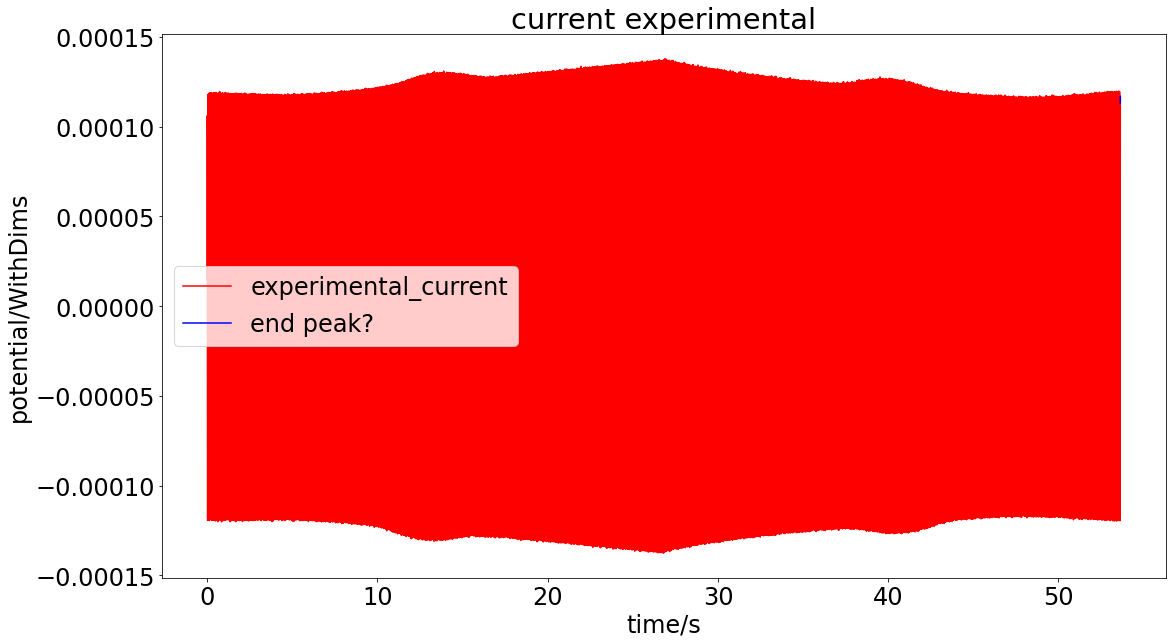

highlighted_region:  [0.00011316 0.00011367 0.00011604 0.00011644 0.00011676]
corresponding times:  [53.64058 53.64081 53.64104 53.64127 53.6415 ]


In [100]:
#checks and plot

exp_times = reduced_by_class.time
exp_times = np.asarray(exp_times)
exp_current = reduced_by_class.current
exp_current = np.asarray(exp_current)
measurements = reduced_by_class.shape[0]
full_range=measurements
print('meausrements in both directions: ', measurements)
measurements = int(measurements/2)
print('meausrements in single direction: ', measurements)


region = 5
plt.figure(figsize=(18,10))
plt.title("current experimental")
plt.ylabel("potential/WithDims")
plt.xlabel("time/s")
plt.plot(exp_times, exp_current,'r', label='experimental_current')
plt.plot(exp_times[full_range-region:full_range], exp_current[full_range-region:full_range],'b', label='end peak?')
plt.legend(loc='best')
#plt.yscale("log")
#plt.savefig('ac_current_pints.pdf')
plt.show()
print('highlighted_region: ', exp_current[full_range-region:full_range])
print('corresponding times: ', exp_times[full_range-region:full_range])

# highlighted_region:  [5.704037e-05 5.658573e-05 5.703470e-05 5.811337e-05 6.314795e-05]
# corresponding times:  [53.6855  53.68589 53.68627 53.68666 53.68704]

In [101]:
# delacring know model paramters

inital_current = exp_current[0]
freq = 2.197921e+01
startPotential= -150.0E-3
revPotential = -750.0E-3
rateOfPotentialChange = -22.35174e-3

deltaepislon = 150.0E-3
electrode_area = 0.03
electode_coverage = 6.5e-12
# delacring capactiance parameters
# (gamma0, gamma1, gamma2, gamma3, omega)
cap_params = [1.95036308433046431e-04,  4.16836176649199031e-05,  1.08476307143738973e-04,  4.57902518473211895e-06,
                        2.04911057528037486e-04,  1.24891867796406153e-04,  2.68891849089009441e-04,  1.03444269036792255e-04,
                        1.37982415501857133e+02]

uncomp_resis = 2.01411535318853758e+01


In [102]:
# declaring main model for manipulation purposes no symulations are done at this point
model = wrappedNewton(times = exp_times, inital_current=inital_current, freq=freq)

measurements = exp_current.shape[0]
print('measurements: ', measurements)
if measurements%2 !=0:
    print('*'*30+'\nerror must have evennumber of measurments\n'+'*'*40)

# declaring model to obtain non dimensinalise constant
trial = newtonRaphsonFT(timeStepSize=exp_times[1], inital_current=inital_current, freq=freq, startPotential= startPotential, revPotential = revPotential,
                        rateOfPotentialChange = rateOfPotentialChange, numberOfMeasurements = measurements, electrode_area=electrode_area, electode_coverage=electode_coverage)

# non-diming experimental data
exp_current_dimless = exp_current/trial.I0

# # un reduced
# model = wrappedNewton(times = exp_times, inital_current=inital_current, freq=freq, startPotential= startPotential, revPotential = revPotential,
#                         rateOfPotentialChange = rateOfPotentialChange, deltaepislon=deltaepislon, electrode_area=electrode_area,
#                         electode_coverage=electode_coverage, initaldiscard = 0.025, enddiscard = 0.905, cap_params = cap_params, uncomp_resis = uncomp_resis)


# # halved
# model = wrappedNewton(times = exp_times, inital_current=inital_current, freq=freq, startPotential= startPotential, revPotential = revPotential,
#                         rateOfPotentialChange = rateOfPotentialChange, deltaepislon=deltaepislon, electrode_area=electrode_area,
#                         electode_coverage=electode_coverage, initaldiscard = 0.050, enddiscard = 0.815, cap_params = cap_params, uncomp_resis = uncomp_resis)



model = wrappedNewton(times = exp_times, inital_current=inital_current, freq=freq, startPotential= startPotential, revPotential = revPotential,
                        rateOfPotentialChange = rateOfPotentialChange, deltaepislon=deltaepislon, electrode_area=electrode_area,
                        electode_coverage=electode_coverage, initaldiscard = 0.034, enddiscard = 0.873, cap_params = cap_params, uncomp_resis = uncomp_resis)

measurements:  232820


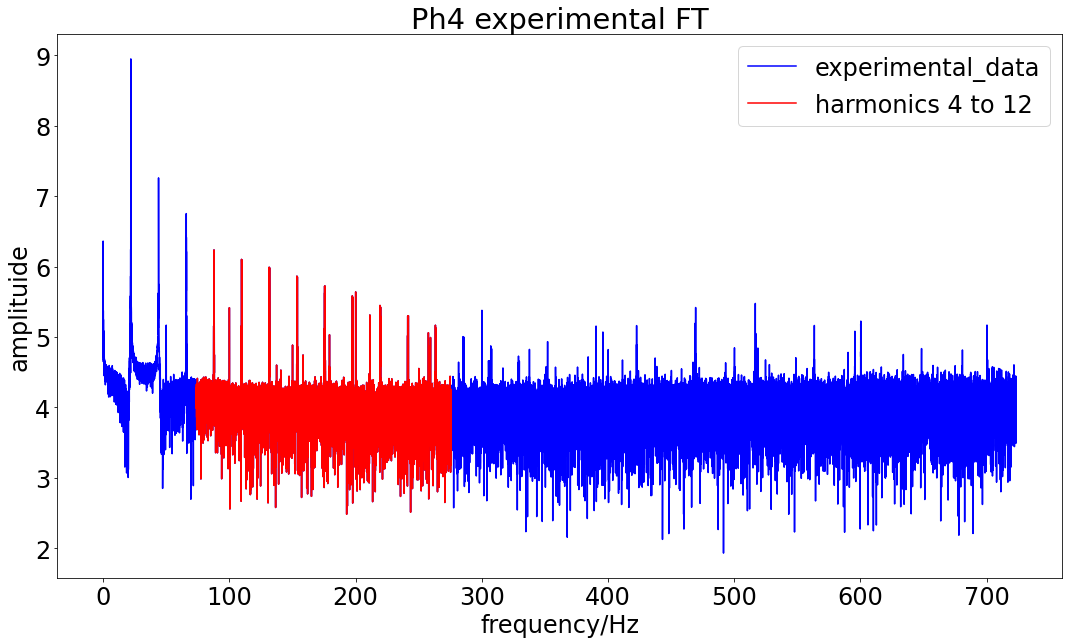

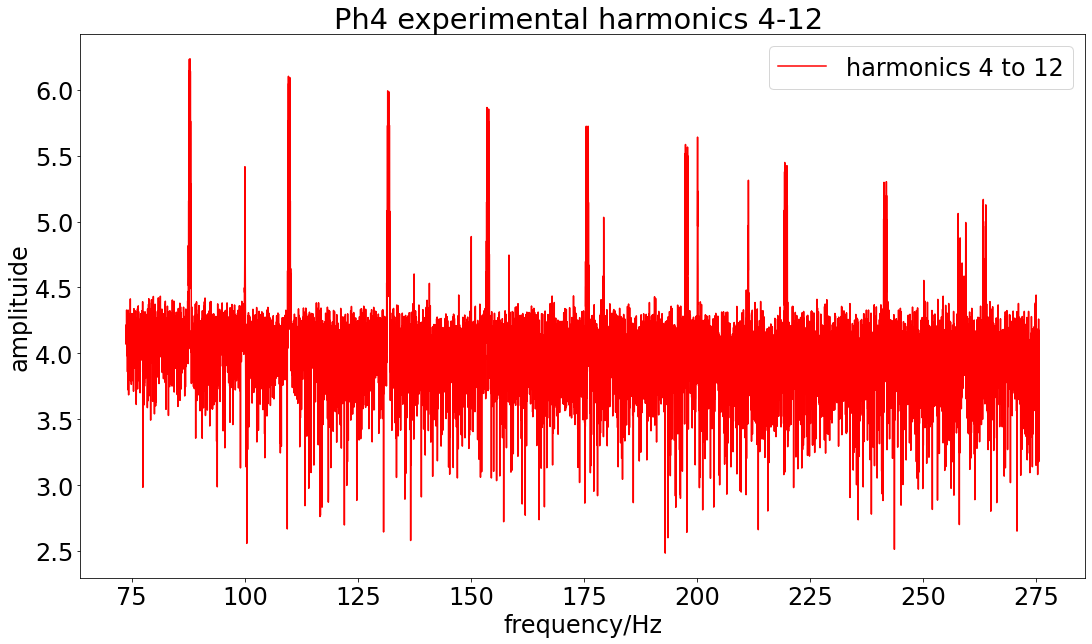

In [103]:
# checking loaction of harmonics 1-4
half_of_measuremnts = int(measurements/2)

# full FT and frequencies
full_sim = np.fft.fft(exp_current_dimless)
half_full_sim = full_sim[:half_of_measuremnts]

freq_org = np.fft.fftfreq(exp_times.shape[-1], d= exp_times[1])
freq_org=freq_org[:half_of_measuremnts]

# regional FT and Frequency

freq = model.frequencies_for_harmonics_4_to_12(exp_times)

harmonics1To4 = model.FT_and_reduce_to_harmonics_4_to_12(exp_current_dimless)

xaxislabel = "frequency/Hz" # "potential/V"
plt.figure(figsize=(18,10))
plt.title("Ph4 experimental FT")
plt.ylabel("amplituide")
plt.xlabel(xaxislabel)
plt.plot(freq_org[:int(half_of_measuremnts/3)], np.log10(half_full_sim[:int(half_of_measuremnts/3)]),'b', label='experimental_data')
plt.plot(freq, np.log10(harmonics1To4),'r', label='harmonics 4 to 12')
plt.legend(loc='best')
plt.show()

xaxislabel = "frequency/Hz" # "potential/V"
plt.figure(figsize=(18,10))
plt.title("Ph4 experimental harmonics 4-12 ")
plt.ylabel("amplituide")
plt.xlabel(xaxislabel)
plt.plot(freq, np.log10(harmonics1To4),'r', label='harmonics 4 to 12')
plt.legend(loc='best')
plt.show()

**********cacluating harmonic spacing**********
x[0][-1]:  1179
y[0][0]:  1180
z[0]:  []


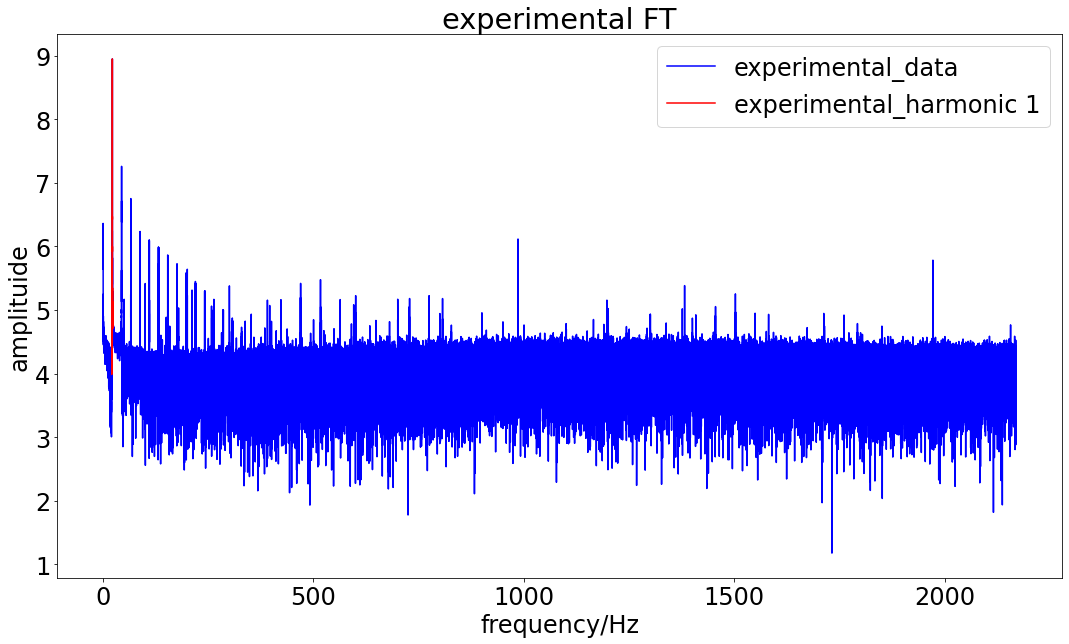

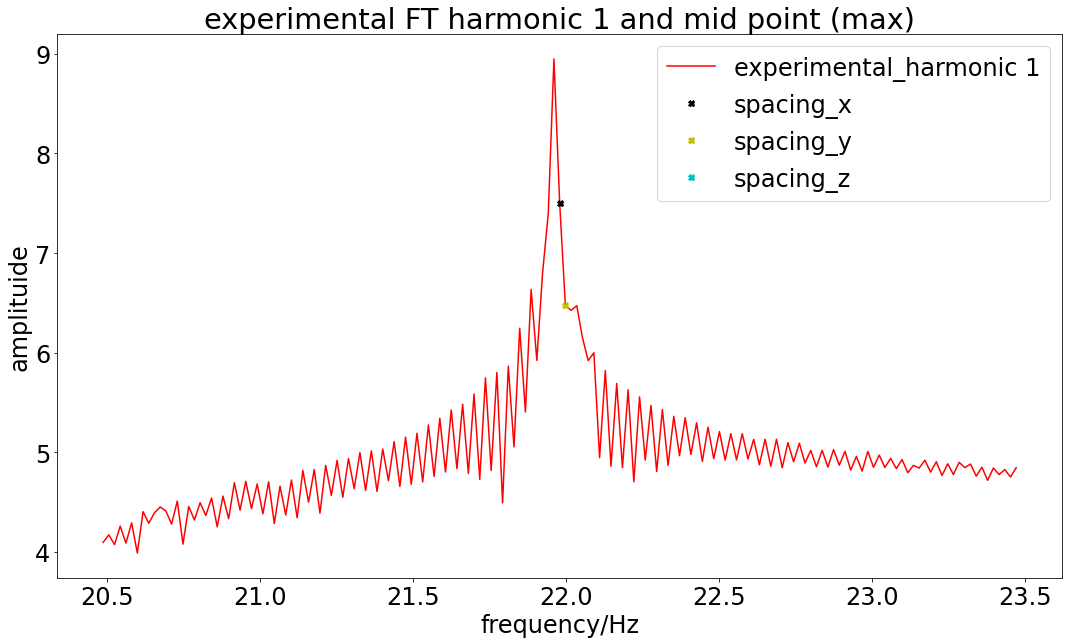

Spacing between harmonics:  1179

**********cacluating location of 4th harmonic**********
mid point index of 4th harmonic:  759

**********index distance of 1.5Hz**********
index window covering 1.5Hz:  80.462592
int index window covering 1.5Hz:  80.0
sim_plot.shape: (161,)
mid_upper_sim_plot.shape: (81,)
lower_sim_plot.shape: (80,)


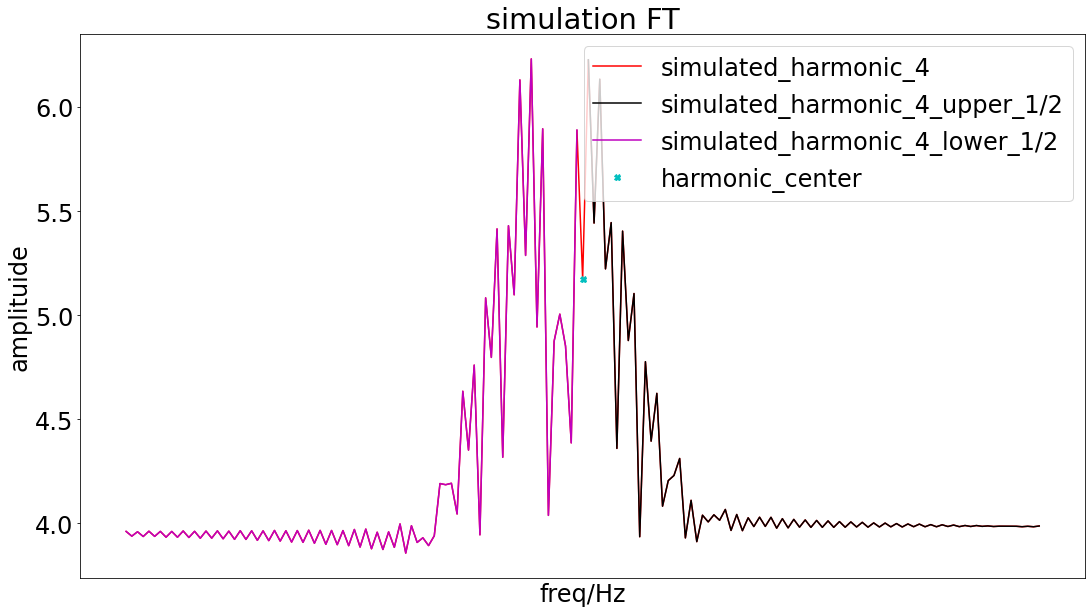

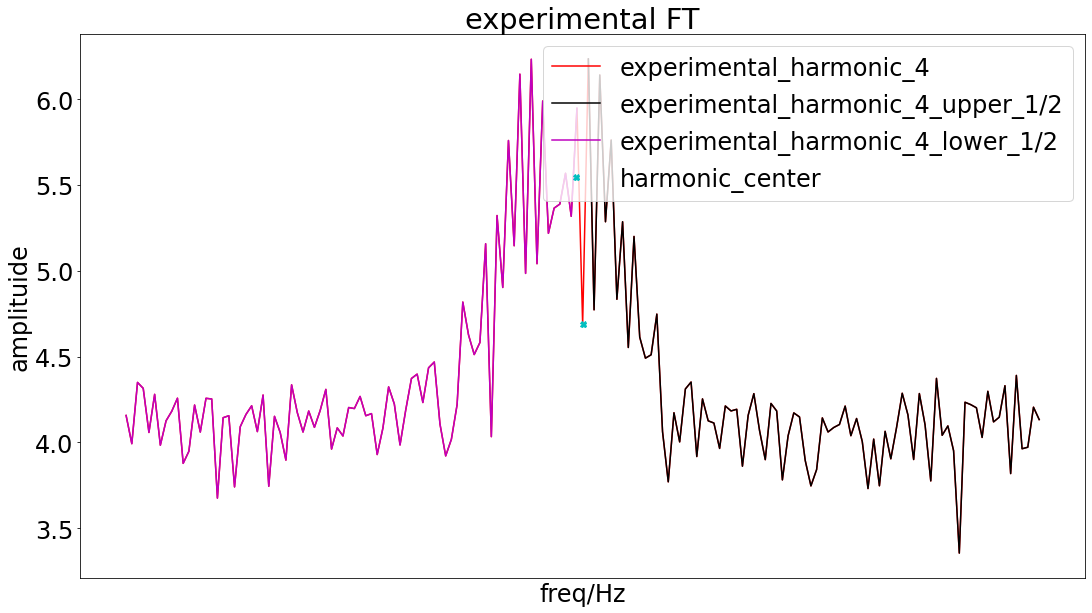

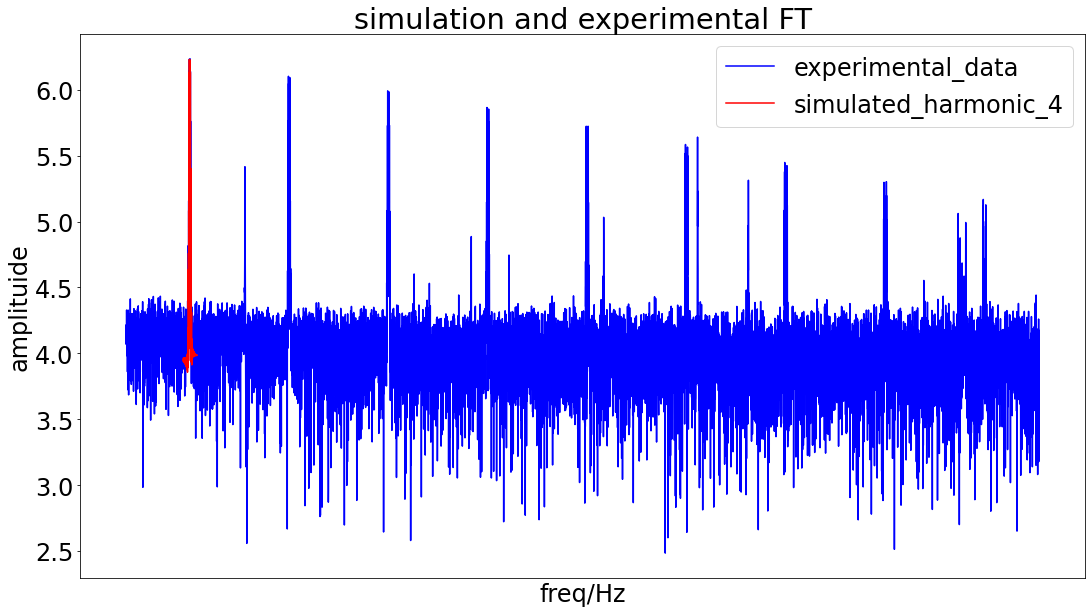

sim_plot.shape: (161,)
mid_upper_sim_plot.shape: (81,)
lower_sim_plot.shape: (80,)


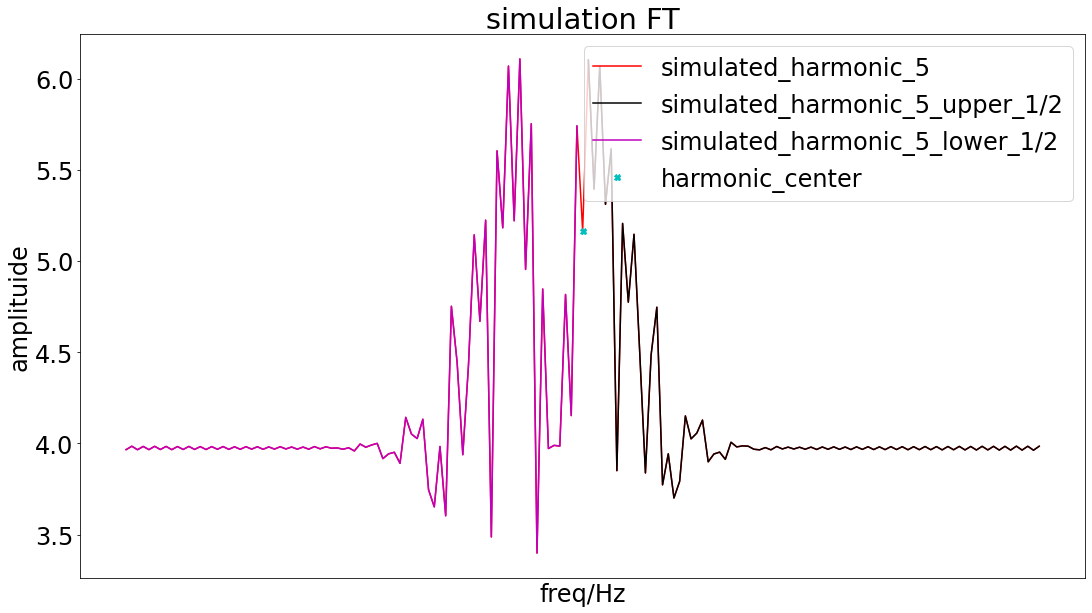

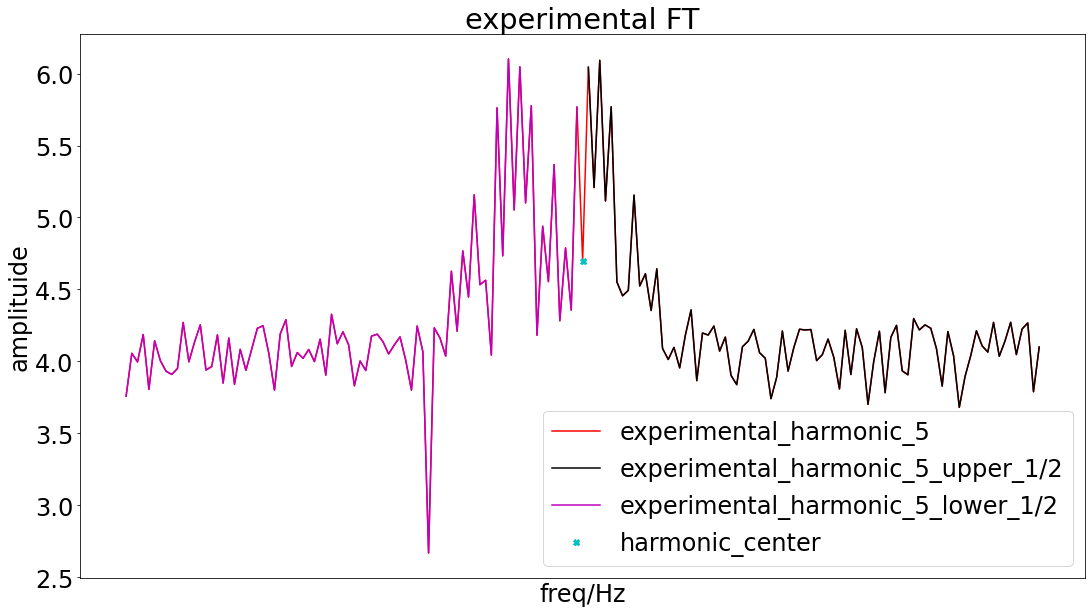

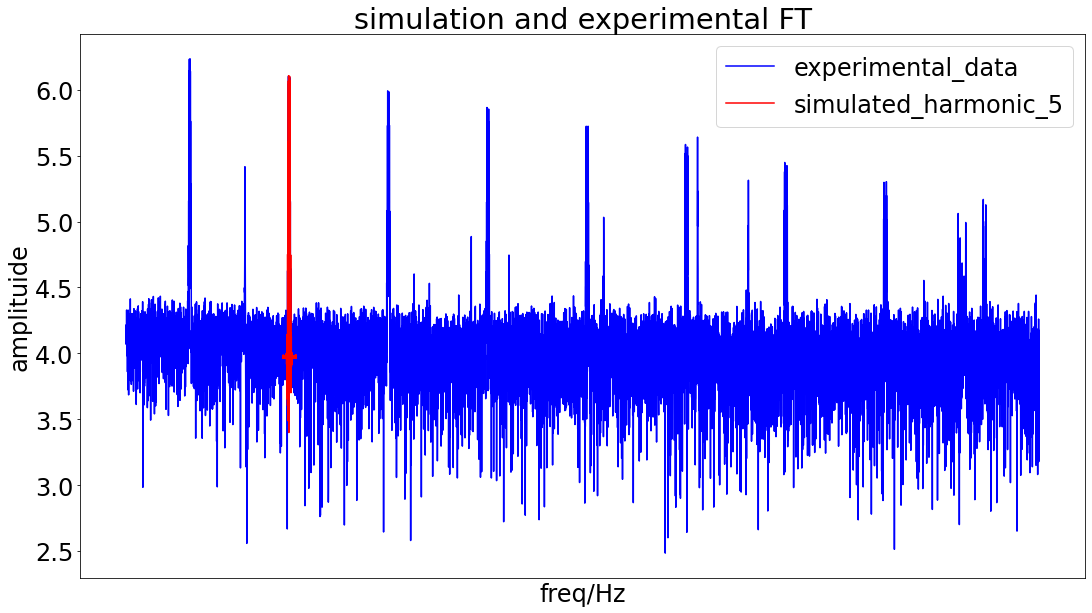

sim_plot.shape: (161,)
mid_upper_sim_plot.shape: (81,)
lower_sim_plot.shape: (80,)


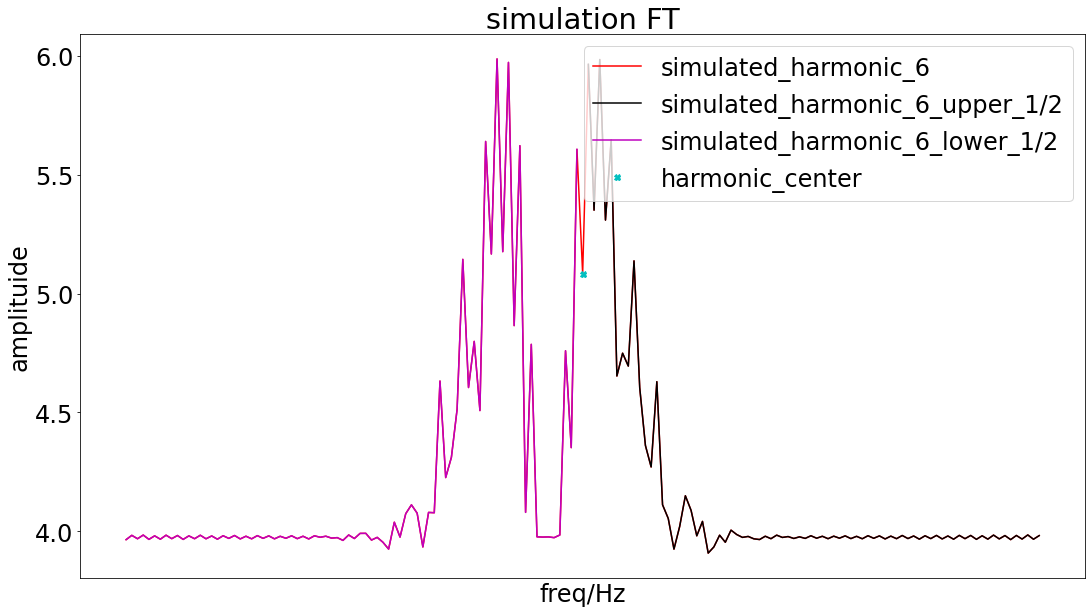

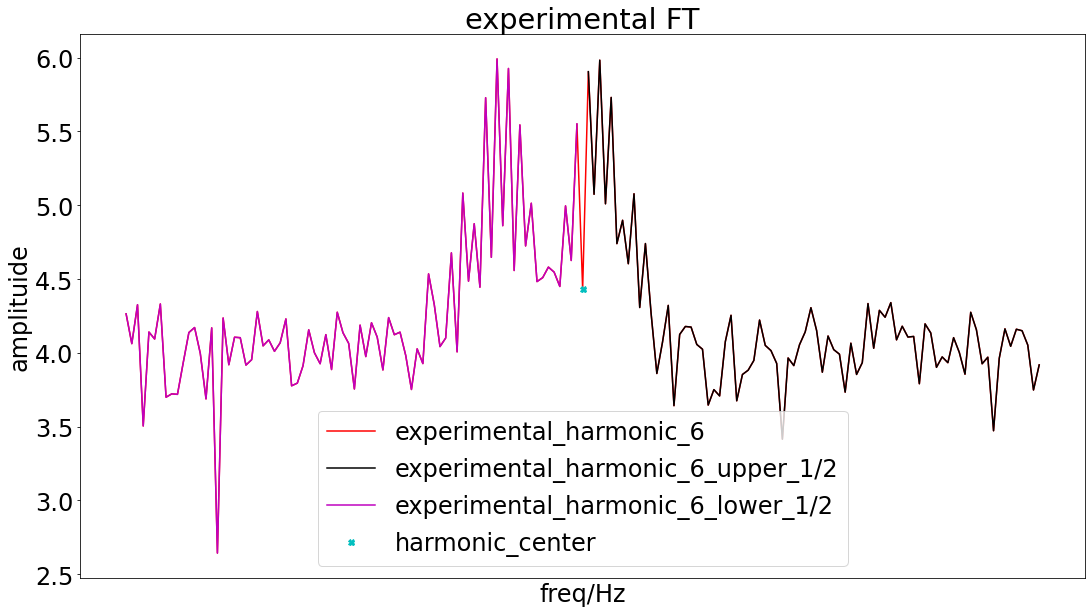

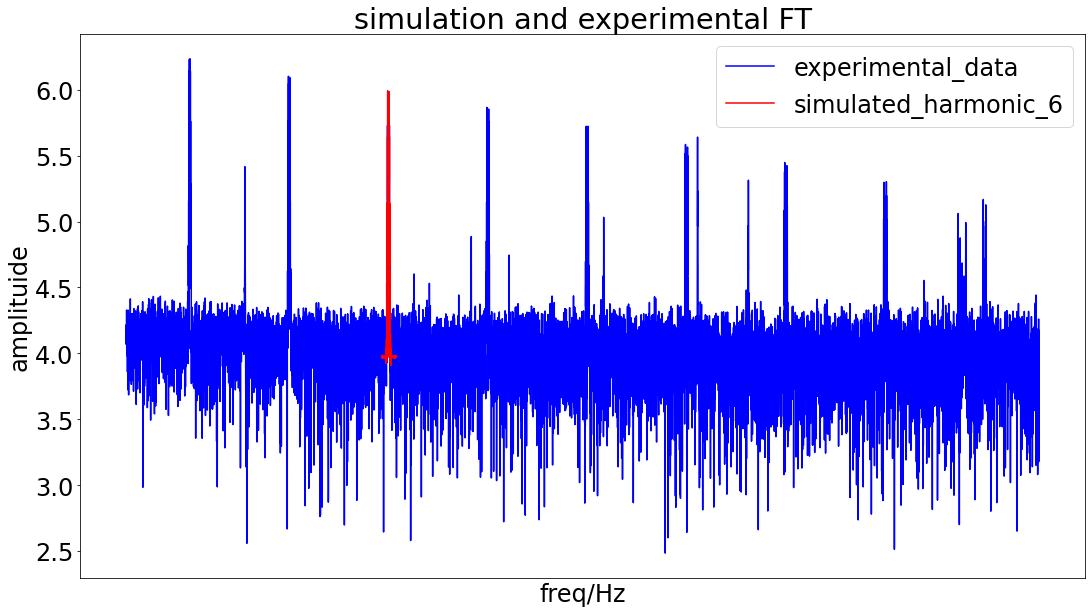

sim_plot.shape: (161,)
mid_upper_sim_plot.shape: (81,)
lower_sim_plot.shape: (80,)


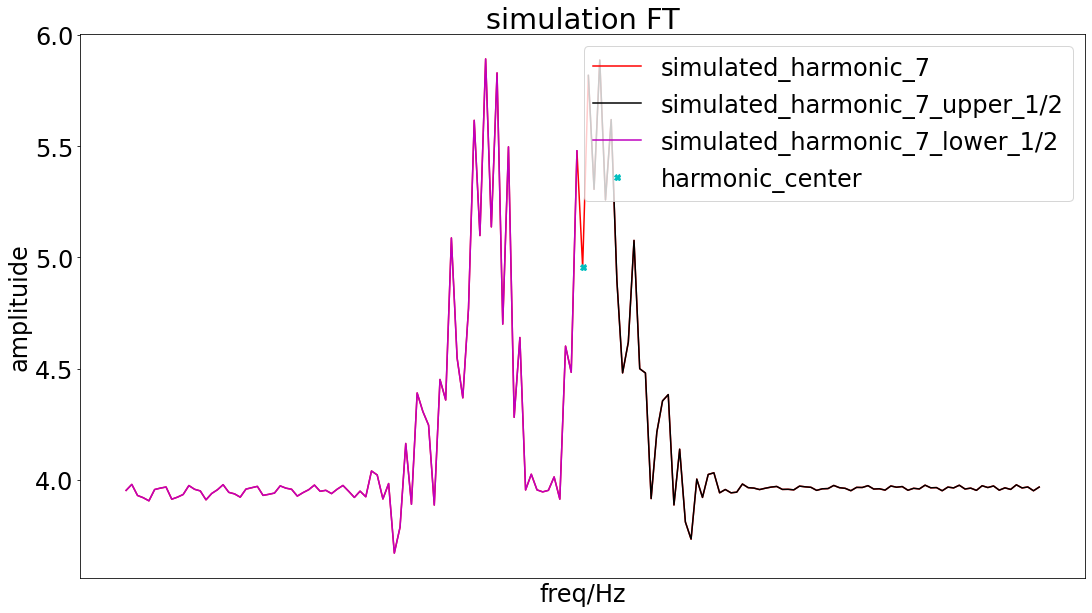

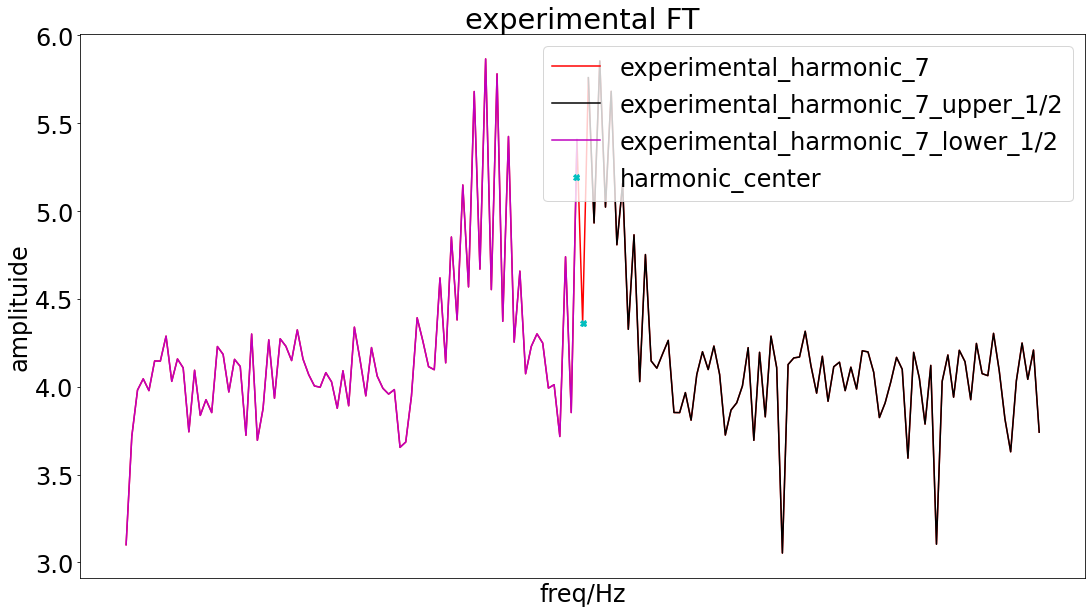

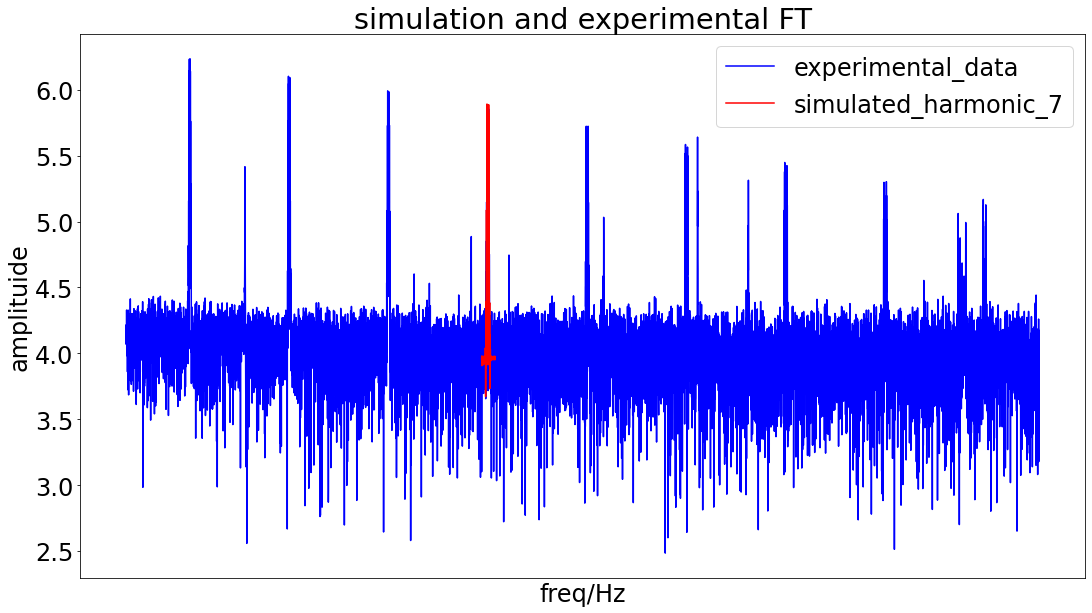

sim_plot.shape: (161,)
mid_upper_sim_plot.shape: (81,)
lower_sim_plot.shape: (80,)


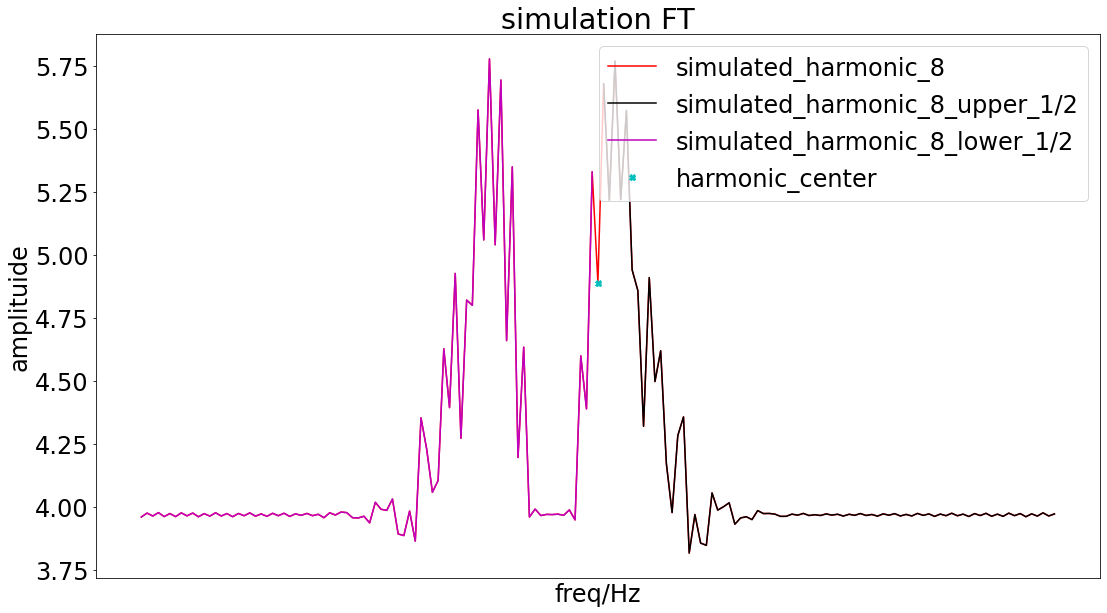

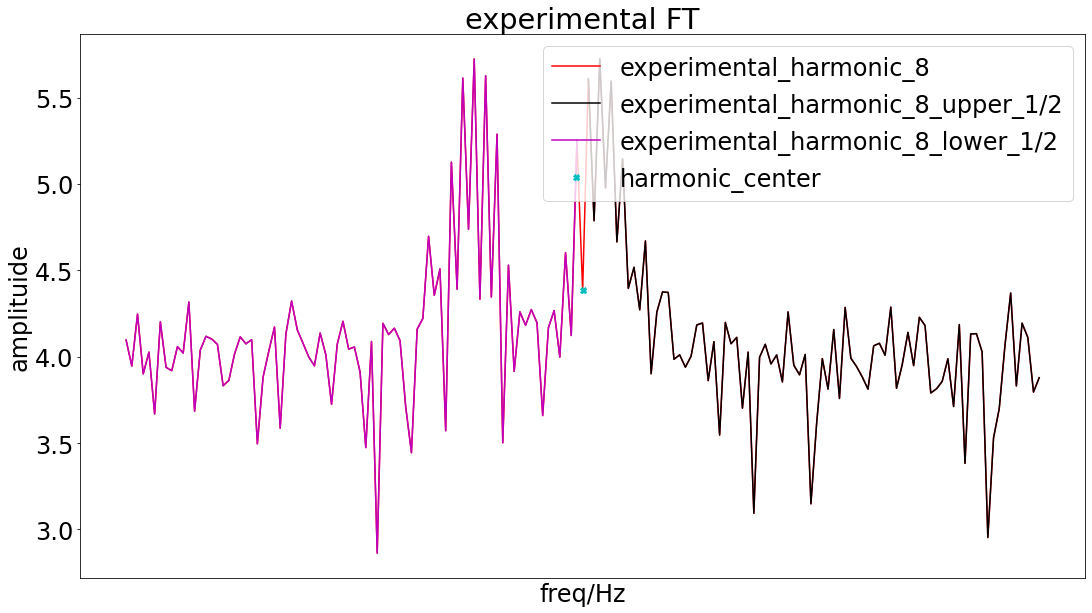

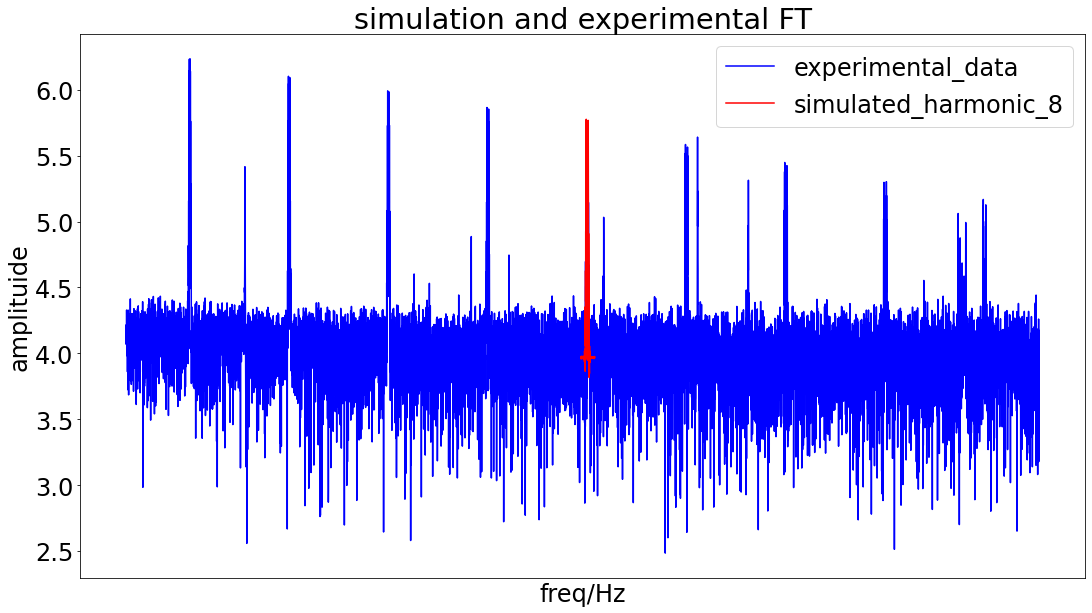

sim_plot.shape: (161,)
mid_upper_sim_plot.shape: (81,)
lower_sim_plot.shape: (80,)
sim_plot.shape: (161,)
mid_upper_sim_plot.shape: (81,)
lower_sim_plot.shape: (80,)


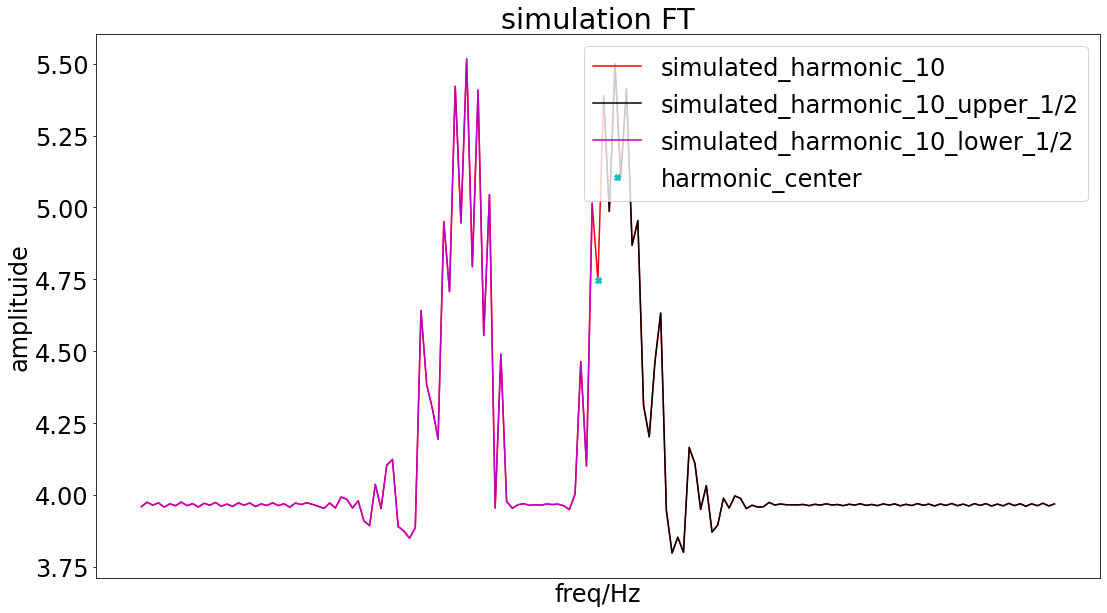

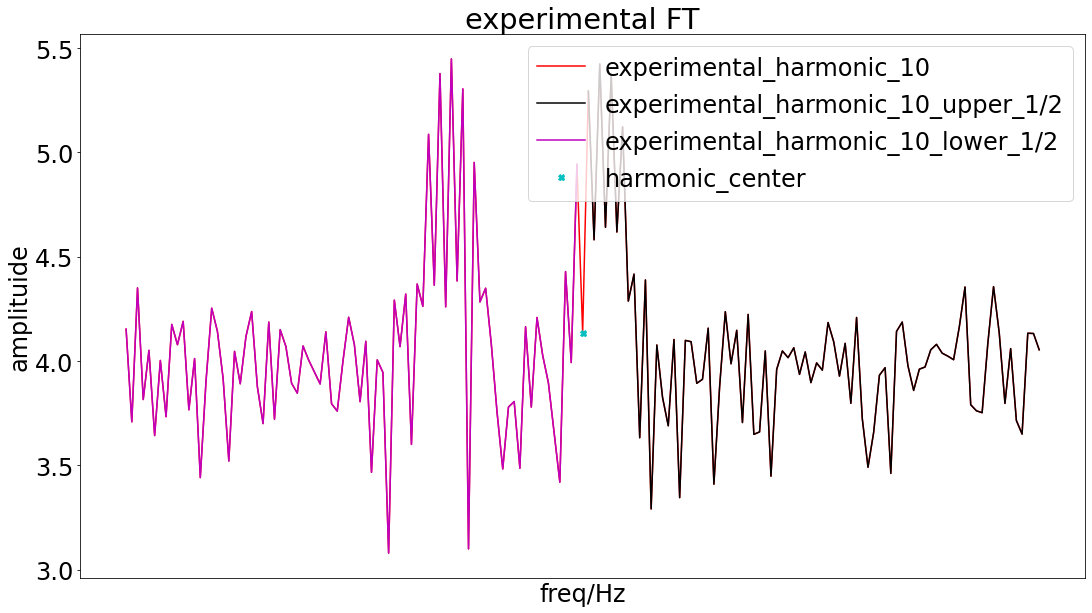

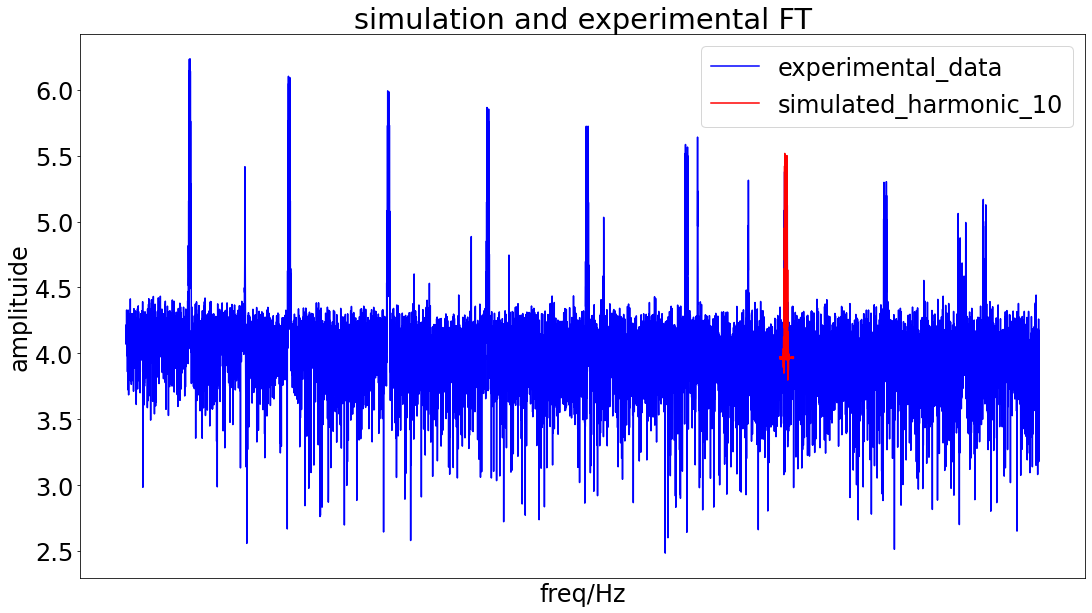

sim_plot.shape: (161,)
mid_upper_sim_plot.shape: (81,)
lower_sim_plot.shape: (80,)
sim_plot.shape: (161,)
mid_upper_sim_plot.shape: (81,)
lower_sim_plot.shape: (80,)


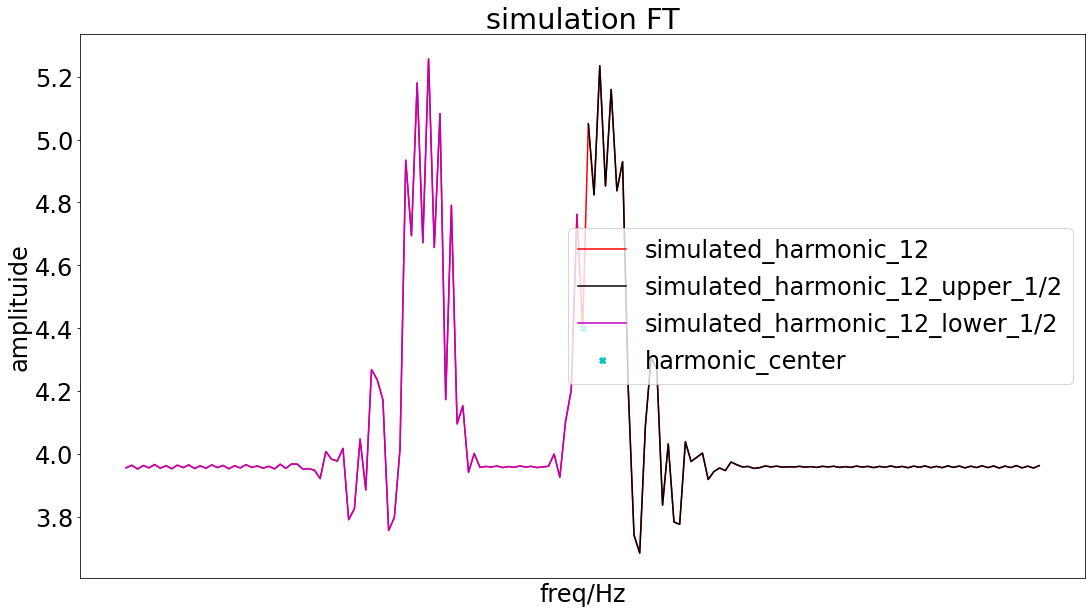

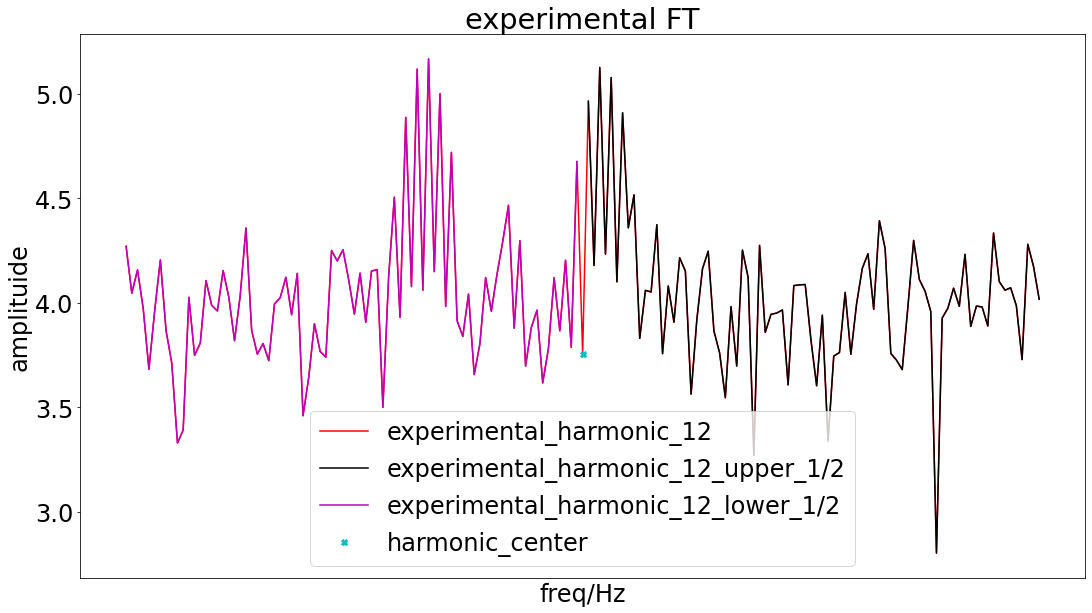

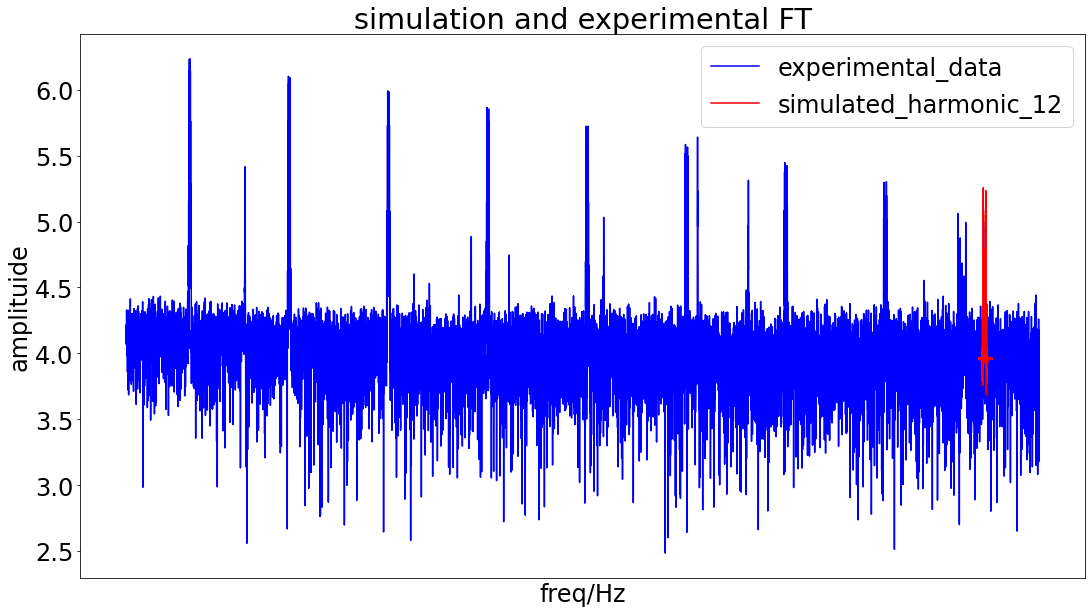

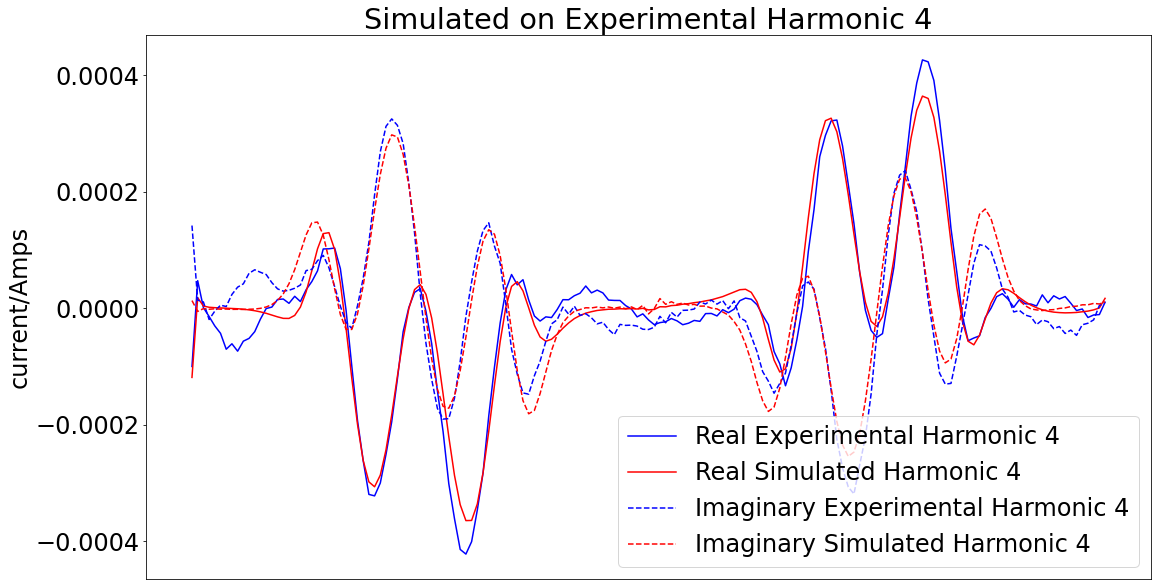

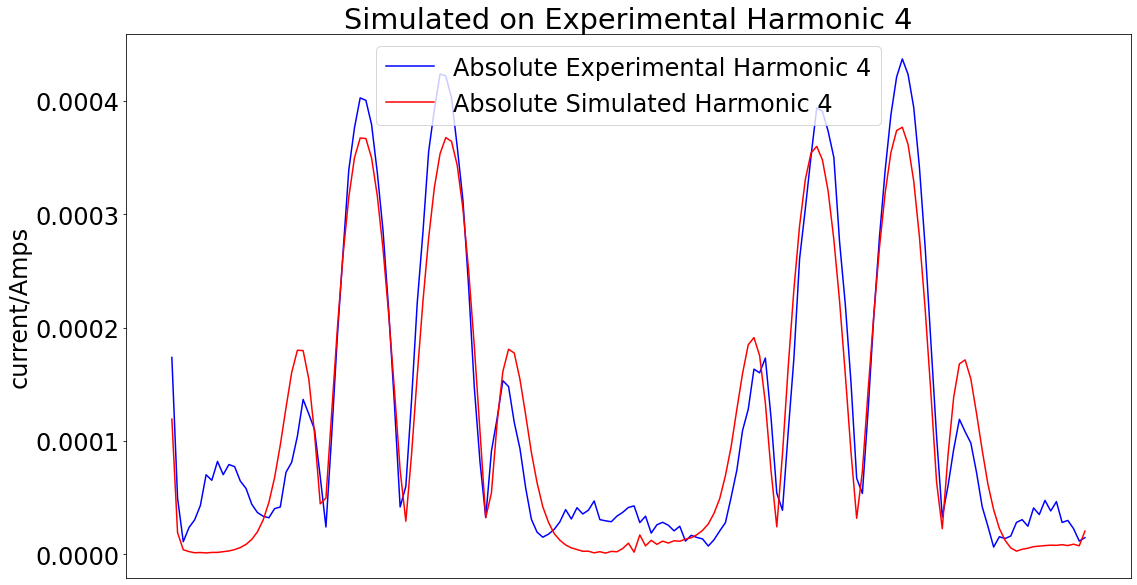

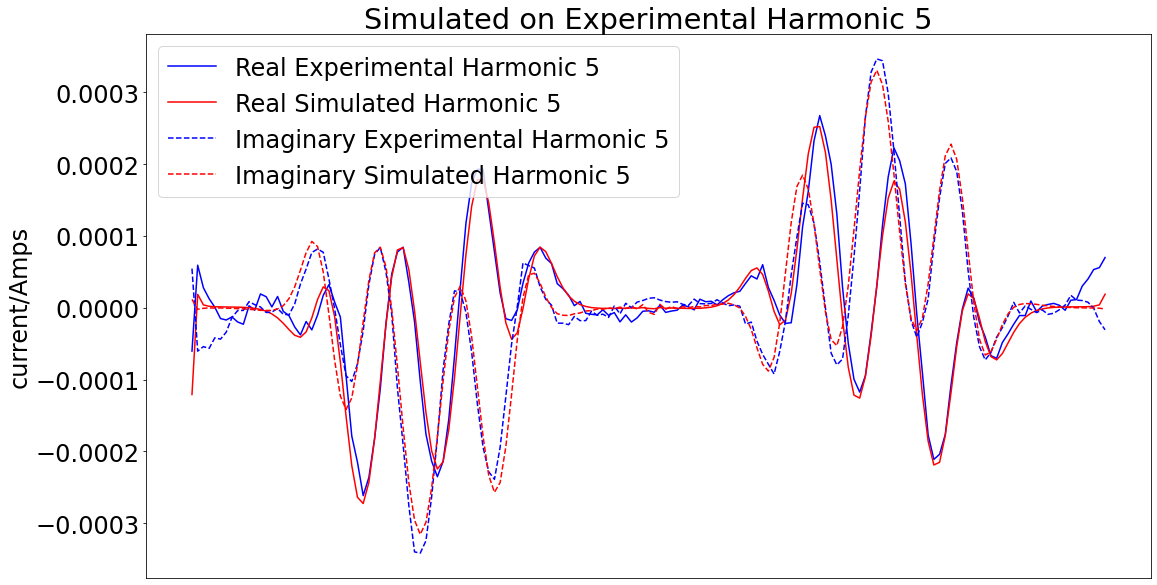

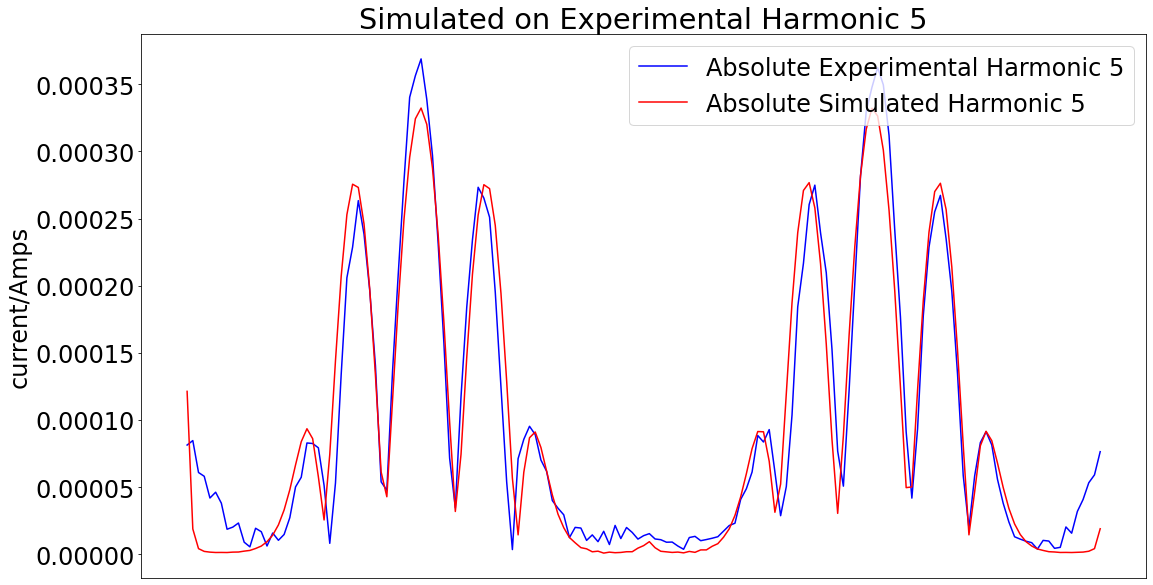

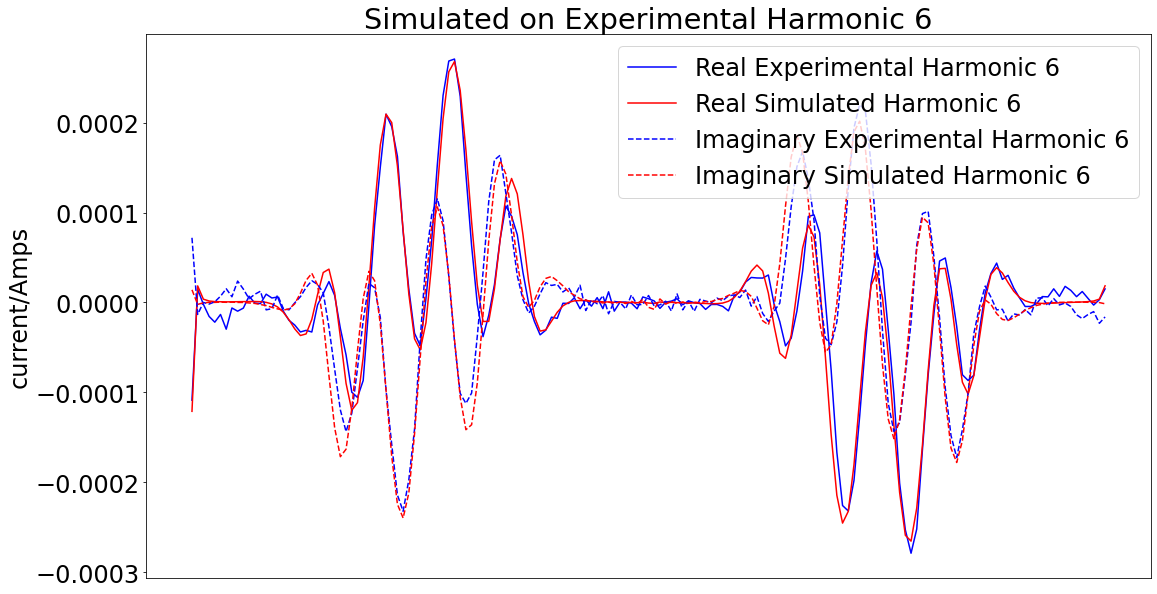

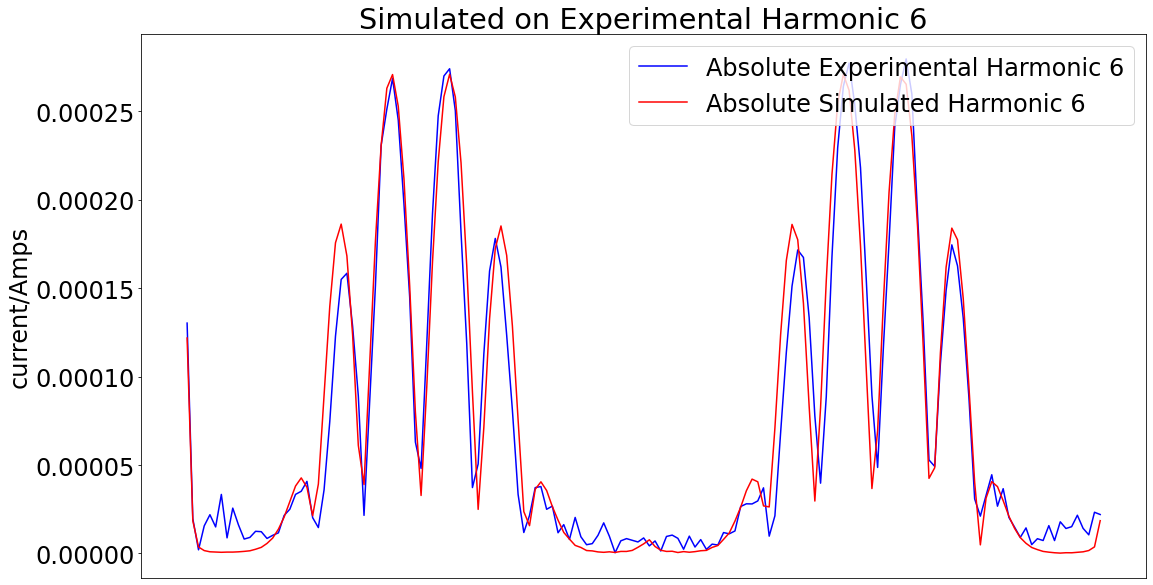

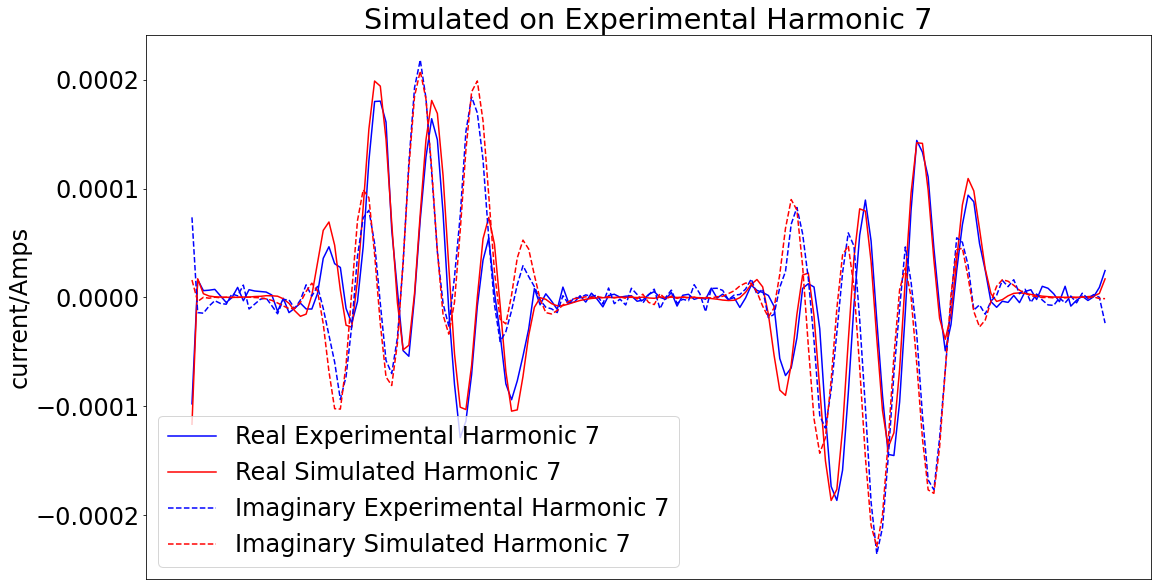

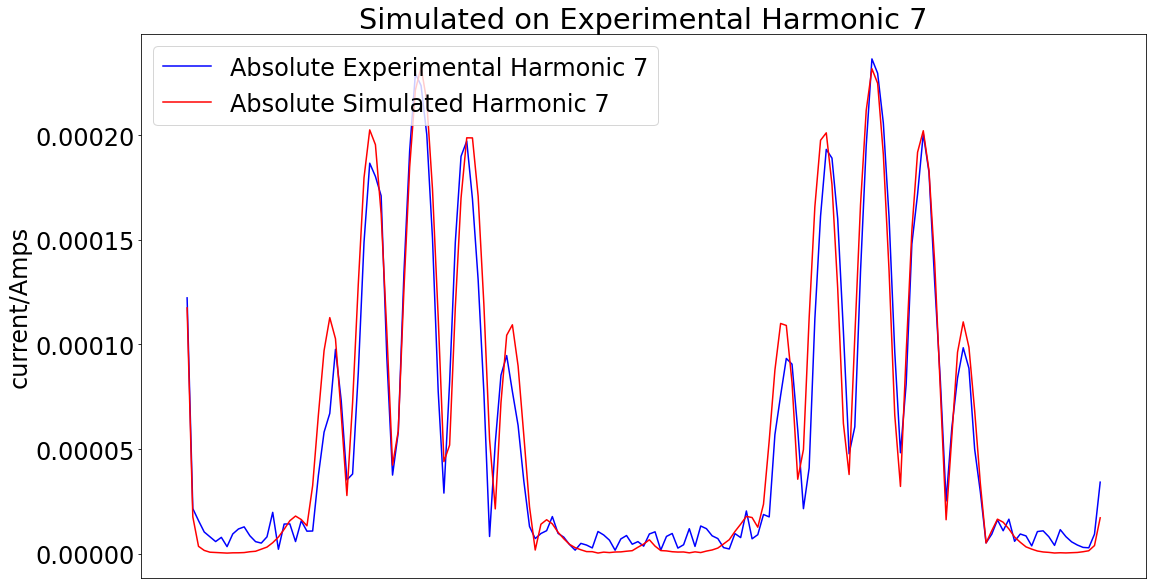

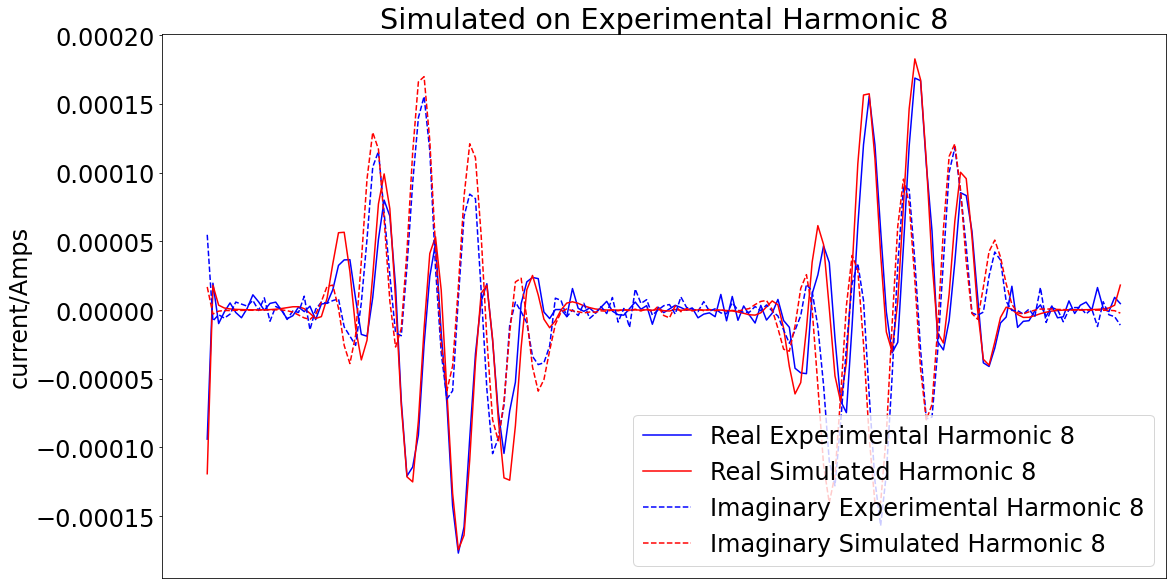

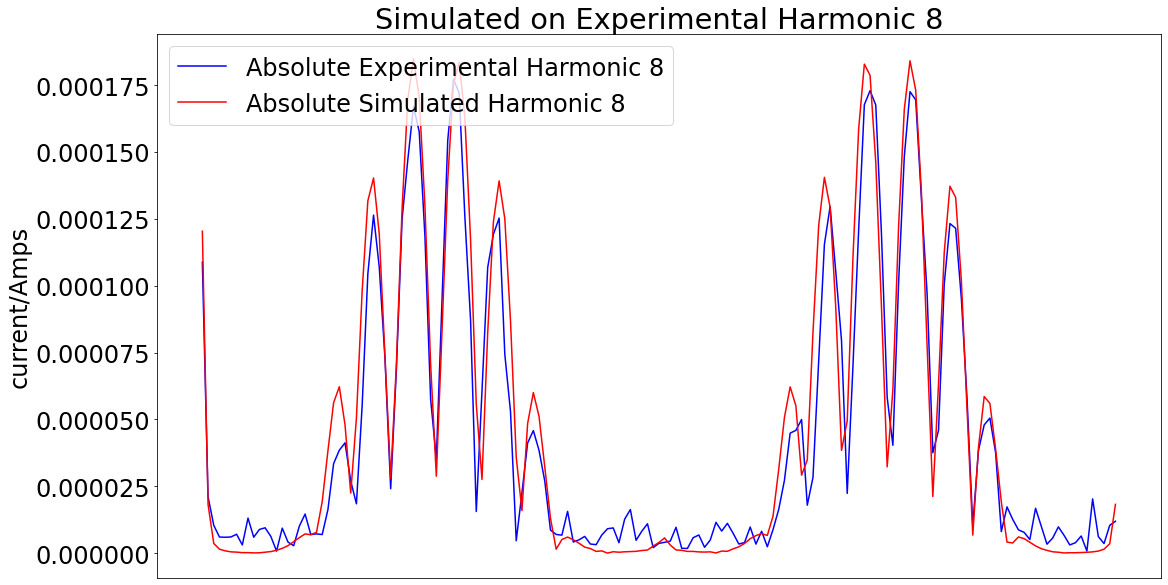

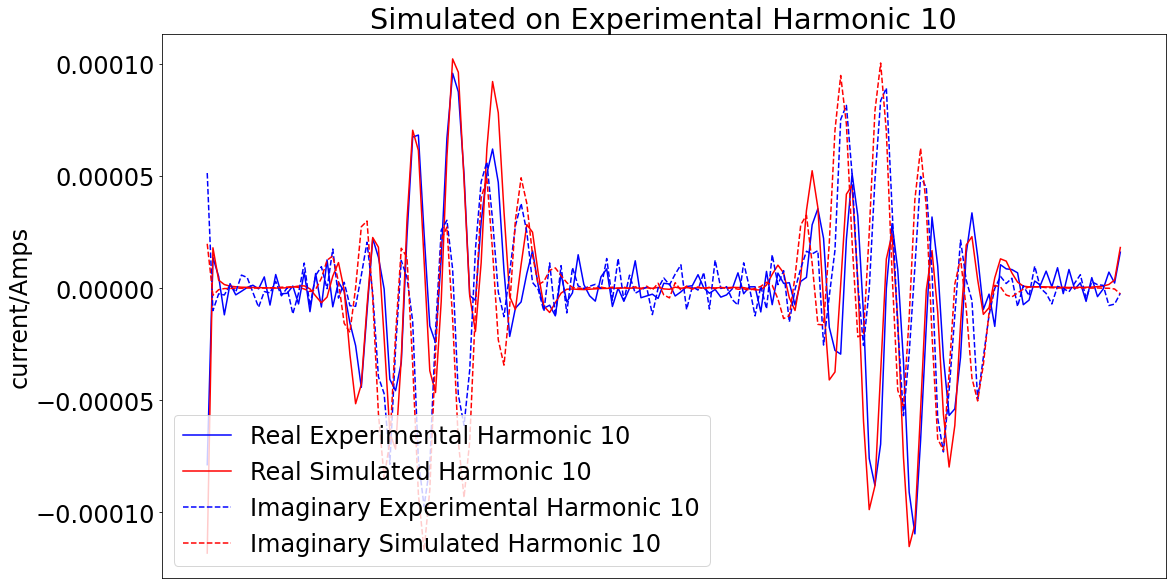

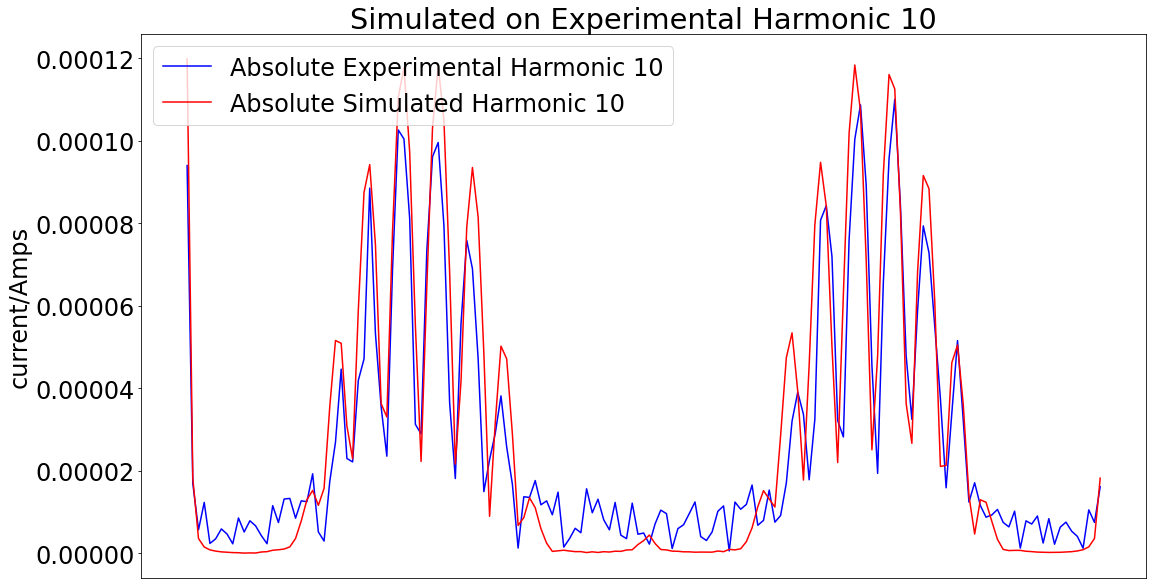

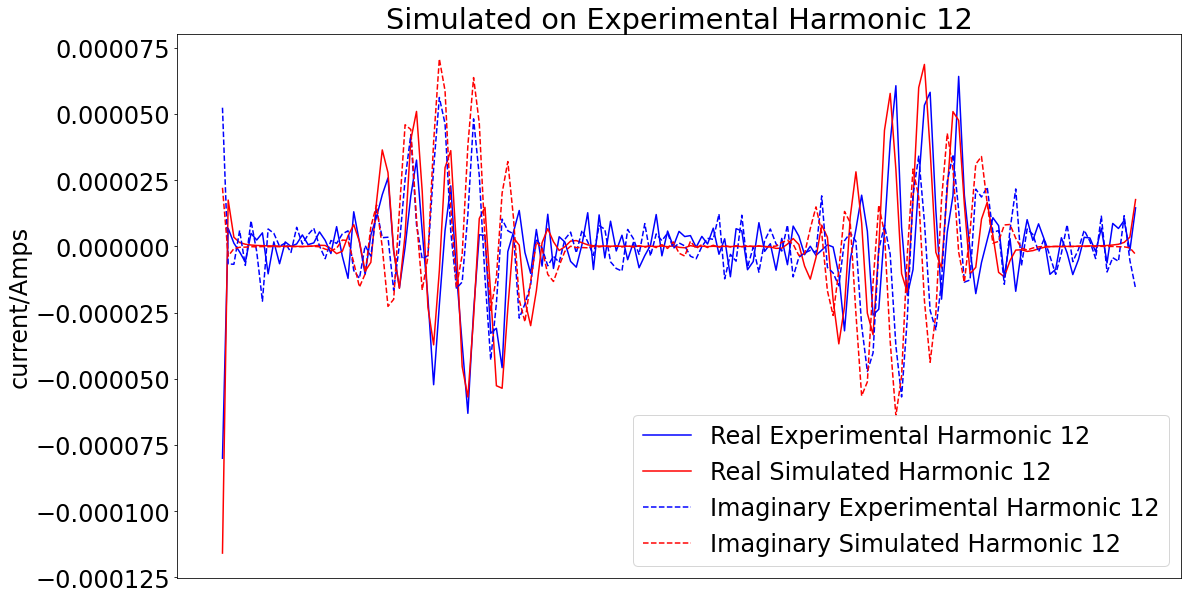

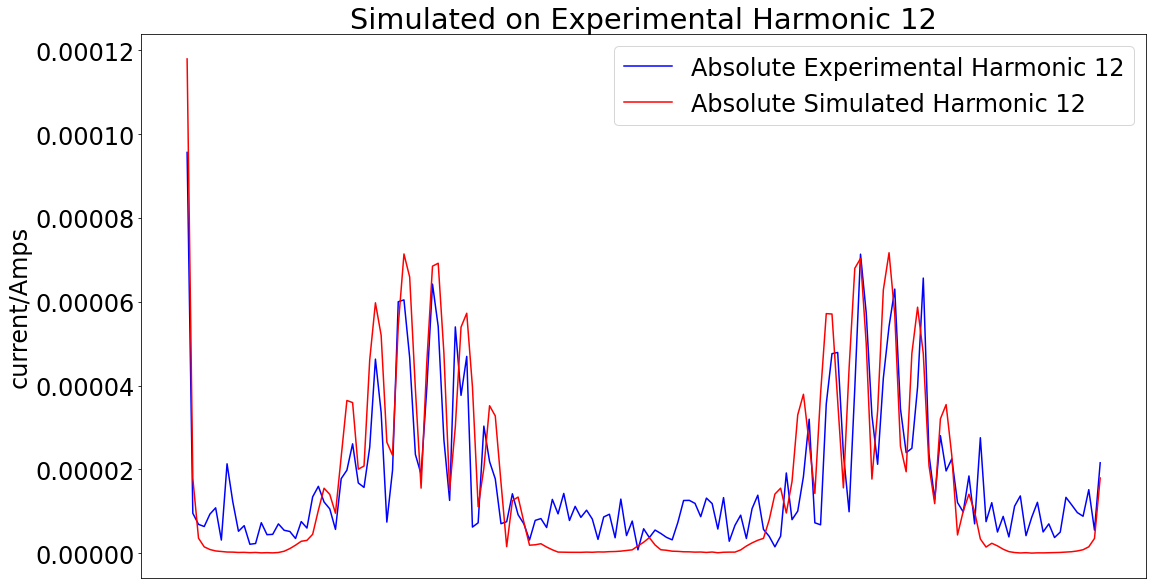

In [104]:
# checking harmonics are in the right place
real_parameters = model.suggested_parameter()
real_parameters = np.asarray(real_parameters)
real_parameters = [3.99999999985365685e+03,  3.99999999999956299e+03,
-4.66356811586286946e-01, -4.42784258594993763e-01,
2.27969072427586794e-02,  4.80987434392665947e-01]
print_all_harmonics = False
print_these_harmonics = [4,5,6,7,8,10,12,13]
model.ploting_harmonic(experimental_data = exp_current_dimless, times = exp_times, parameter_for_sim = real_parameters, Hz_interval = 1.5, print_all_harmonics= print_all_harmonics, print_these_harmonics = print_these_harmonics, check_FT_harmonic_locations = True, print_harmonics = True)